<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

<h1><center>Exploratory Data Analysis Project on Breast Cancer Patients Survival</center>
<img src="BC Logo.png" width="40" height="60" /> 


#### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## <center>Objective: To Analyse the Data for Breast Cancer Patients and determine trends of their survival</center>

#### Import the required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling  
import warnings

In [2]:
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")
%matplotlib inline

#### Load the Dataset

In [3]:
bc = pd.read_csv("Breast_cancer_survival.csv")
bc.head(2)

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1


#### Let's understand the Data on As-Is Basis

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year


#### Let's rename the columns to be more intuitive

In [4]:
bc.rename(columns={"Age":'Patient_Age','Years_of_operation':'Year_of_Operation','Pos_axillary_nodes':'Axil_Nodes_Found','Status':'Survival_Status'},inplace=True)
bc.head(2)

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
0,30,64,1,1
1,30,62,3,1


### Data Analysis

In [5]:
# Describe the Data
bc.describe()

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


> **Observation:** We see that the average Age of the Patient is ~52

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Patient_Age          306 non-null int64
Year_of_Operation    306 non-null int64
Axil_Nodes_Found     306 non-null int64
Survival_Status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


> **Observation:** : Here We notice that there is No NaN in the dataset and all Datatype's are Integers. **Hence, we do not need to clean data or change Data Types.**

#### Survived vs Perished

In [7]:
bc['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

> **Observation:** : We see that 225 survived for 5 years and 81 could'nt survive

Lastly, Let's use Python_Profiling Task to have a look at Data

In [8]:
pandas_profiling.ProfileReport(bc)

#### Now, we have decent idea of the Data, let's plot graphs and answer the below questions.

## Q.) How does  Patient's age Depends on Axil Nodes?

Let's Create a Coulmn in the Data Frame to show the Age_Range Of the Patient

In [9]:
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(20, 90, 10)]
count_unique_age_ranges = len(age_ranges)
bc['Age_Range'] = pd.cut(x=bc['Patient_Age'], bins=count_unique_age_ranges, labels=age_ranges)
bc.head(2)

,Patient_Age,Year_of_Operation,Axil_Nodes_Found,Survival_Status,Age_Range
0,30,64,1,1,20 - 30
1,30,62,3,1,20 - 30


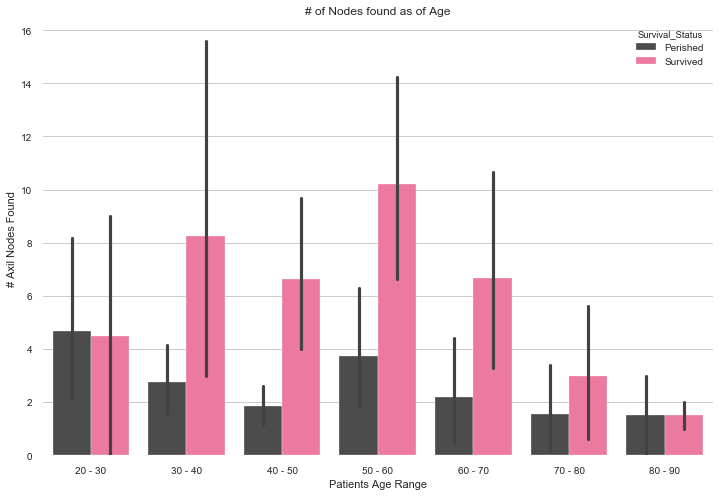

In [10]:
plt.figure(figsize=(12, 8))
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
ax = sns.barplot(x='Age_Range',y='Axil_Nodes_Found',palette=clrs,data=bc,hue='Survival_Status')
ax.set(ylabel='# Axil Nodes Found', xlabel='Patients Age Range',title="# of Nodes found as of Age" )
leg = ax.axes.get_legend()
new_labels = ['Perished','Survived']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.show()

> **Observation:** : We can clearly see with increasing Age Groups, there are lesser nodes.

## Q.) How does number of Nodes and Patient's age affect Survival?

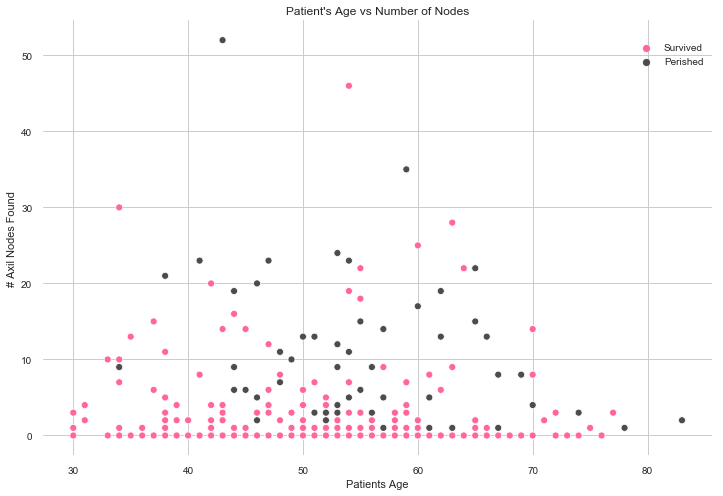

In [11]:
plt.figure(figsize=(12, 8))
clrs = ["#ff6699" if (x < 2) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
sc = sns.scatterplot(x='Patient_Age', y='Axil_Nodes_Found', hue='Survival_Status',palette=clrs, markers=["o", "x"],data=bc)
sc.set(ylabel='# Axil Nodes Found', xlabel='Patients Age',title="Patient's Age vs Number of Nodes" )
leg = sc.axes.get_legend()
new_labels = ['', 'Survived','Perished']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.show()

> **Observation:** : We can clearly see that lesser the axil nodes, better the chances of survival

### Q.) How is Age of the patient related to Year of Operation?

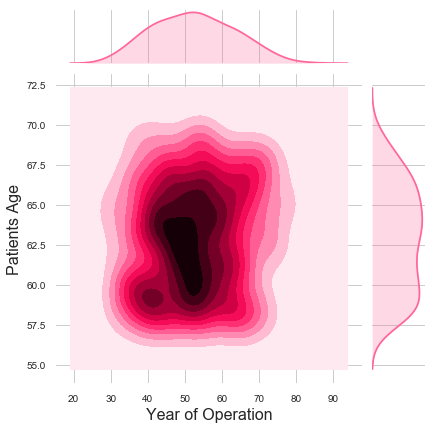

In [12]:
jp1=sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Year_of_Operation', data = bc,color='#ff6699')
#jp1.set(ylabel='Year of Operation', xlabel='Patients Age',title="Patient's Age vs Year of Operation" )
jp1.set_axis_labels('Year of Operation', 'Patients Age', fontsize=16)
plt.show()

> **Observation:** : There are more number of patients undergone operation during the year 1960 - 1964 period and between ages 45 - 55

### Q.) How are the Factors - Age, Year of Operation and Axil Nodes Found Relate? Can we draw any inference?

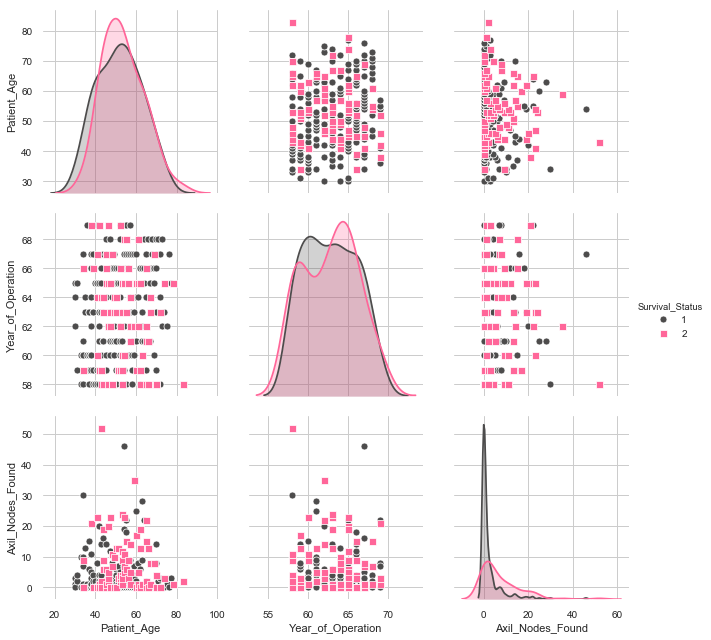

In [13]:
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
cx= sns.pairplot(bc,hue='Survival_Status',size=3,vars=["Patient_Age", "Year_of_Operation","Axil_Nodes_Found"]
                 ,palette=clrs,markers=["o", "s"])
plt.show()

> **Observation:** :There are many indiviadual observations from the above plot. However, before concluding, let's do more analysis for each vaiable.

Let's do a univariate Analysis for each and create a Probability Density Function for each.

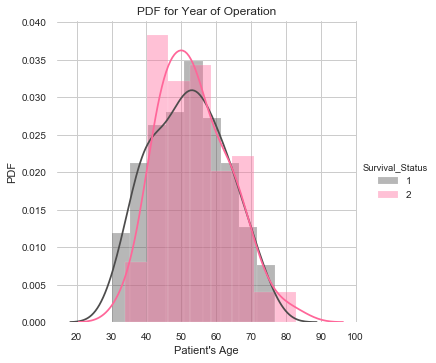

In [14]:
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
dx2= sns.FacetGrid(bc, hue="Survival_Status", size=5,palette=clrs).map(sns.distplot, "Patient_Age").add_legend()
dx2.set(ylabel='PDF', xlabel="Patient's Age",title="PDF for Year of Operation" )
plt.show()

> **Observation:** For Age Group 40, the survival rate is maximum

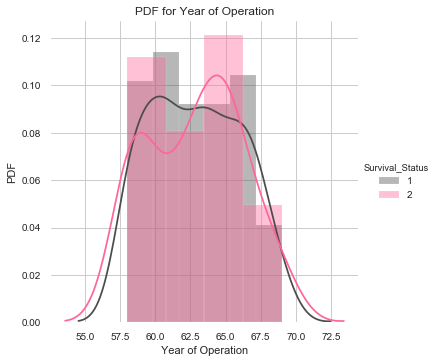

In [15]:
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
dx2= sns.FacetGrid(bc, hue="Survival_Status", size=5,palette=clrs).map(sns.distplot, "Year_of_Operation").add_legend()
dx2.set(ylabel='PDF', xlabel='Year of Operation',title="PDF for Year of Operation" )
plt.show()

> **Observation:** DUring 1965, we had most successful Surgeries

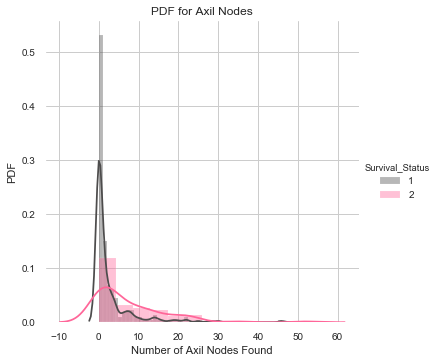

In [16]:
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
dx2= sns.FacetGrid(bc, hue="Survival_Status", size=5,palette=clrs).map(sns.distplot, "Axil_Nodes_Found").add_legend()
dx2.set(ylabel='PDF', xlabel='Number of Axil Nodes Found',title="PDF for Axil Nodes" )
plt.show()

> **Observation:**  Since, most patients had less Nodes, the survival is Max fro 0-10 Nodes. We need to Analyse this further.

#### Let's Create a Box Plot  and Violin Plot for the same.

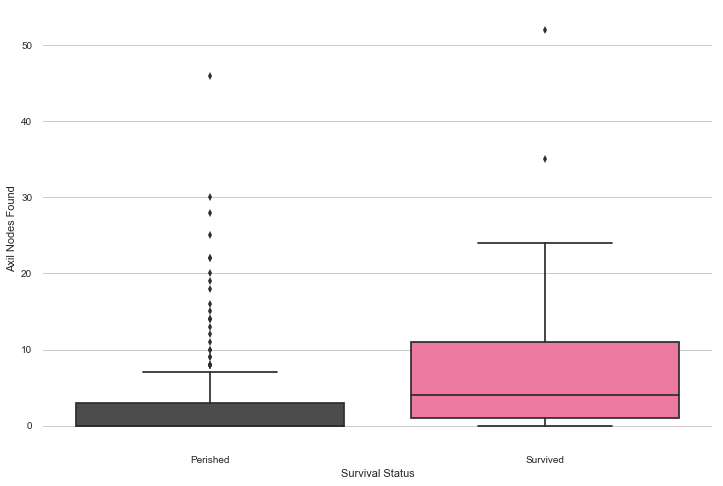

In [17]:
plt.figure(figsize=(12, 8))
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
bp1= sns.boxplot(x='Survival_Status',y='Axil_Nodes_Found', data=bc,palette=clrs)
bp1.set(xlabel='Survival Status',ylabel='Axil Nodes Found', xticklabels=['Perished','Survived'])
plt.show()

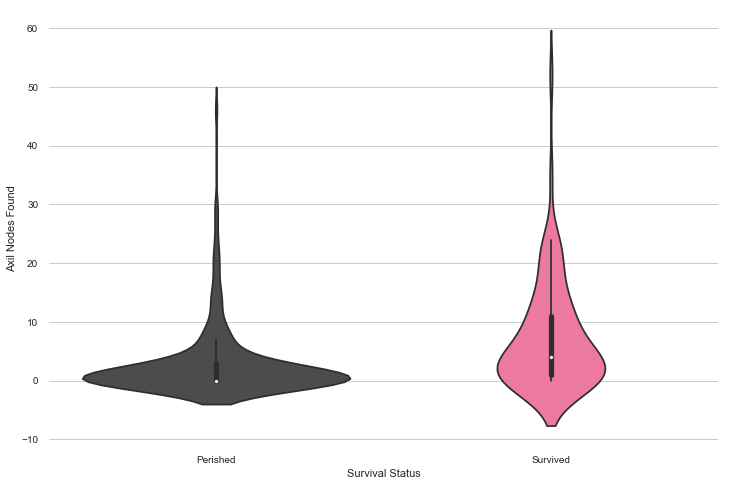

In [18]:
plt.figure(figsize=(12, 8))
clrs = ["#ff6699" if (x > 1) else "#4d4c4c" for x in bc['Survival_Status'].unique() ]
vp = sns.violinplot(x='Survival_Status',y='Axil_Nodes_Found', data=bc, size=8,palette=clrs)
vp.set(xlabel='Survival Status',ylabel='Axil Nodes Found', xticklabels=['Perished','Survived'])
plt.show()

> **Observation:**
> 
>  * 1 -> About 50 percentile people have Axillary nodes 0 and 75 percentile have about 3~ axillary nodes.
>  * 2 -> About 50 percentile people have Axillary nodes more than 4~ and 25 percentile patients have 1-3 nodes.

Let's further analyse this before concluding:

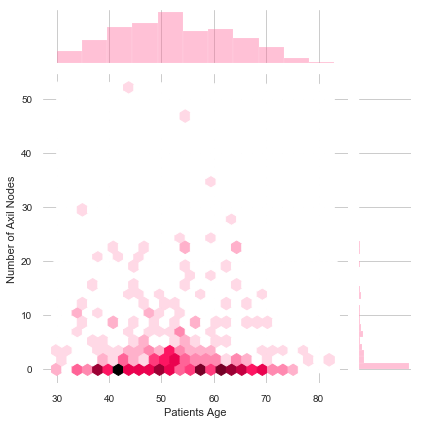

In [19]:
jp1=sns.jointplot(x= 'Patient_Age',kind = 'hex', y='Axil_Nodes_Found', data = bc,color='#ff6699')
#jp1.set(ylabel='Year of Operation', xlabel='Patients Age',title="Patient's Age vs Year of Operation" )
jp1.set_axis_labels( 'Patients Age', 'Number of Axil Nodes')
plt.show()

### Conclusion


#### From the above graphs, we can clearly conclude the below points:
* __As Number of Nodes Increase, the chances of Survival are less.__
* Lesser age group has a better Survival Rate.
* Number of Nodes detected are less is a patient is  senior Citizen.